In [1]:
# Dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp

import warnings

warnings.filterwarnings("ignore")
pd.set_option("precision", 2)

# Creating model object and indicating path
data_path = "../../../input/BES/stratbr_grid_v1.0.0/"
geo_model = gp.create_model("StratBR_BES_v1.0.0")

Not subsurface compatibility available


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Step by step

In [2]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[0, 179000, 0, 148000, -15000, 0],
    resolution=[100, 100, 50],
    path_i=data_path + "surface_strat_reduced_points_with_holder_2.csv",
    path_o=data_path + "orientations_points_reduced_points_1.csv",
)

Active grids: ['regular']


StratBR_BES_v1.0.0  2023-09-19 13:30

In [3]:
gp.get_data(
    geo_model,
    "surfaces",
)

,surface,series,order_surfaces,color,id
0,bes,Default series,1,#015482,1
1,base,Default series,2,#9f0052,2
2,basement,Basement,1,#ffbe00,3


In [4]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 3
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series": ("bes", "base"),
        "Basement_series": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,bes,Strat_Series,1,#015482,1
1,base,Strat_Series,2,#9f0052,2
2,basement,Basement_series,1,#ffbe00,3


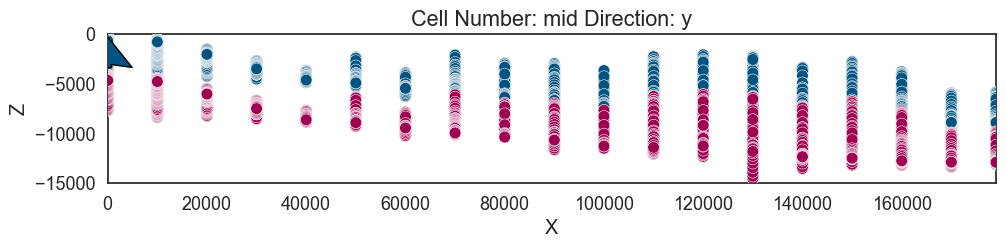

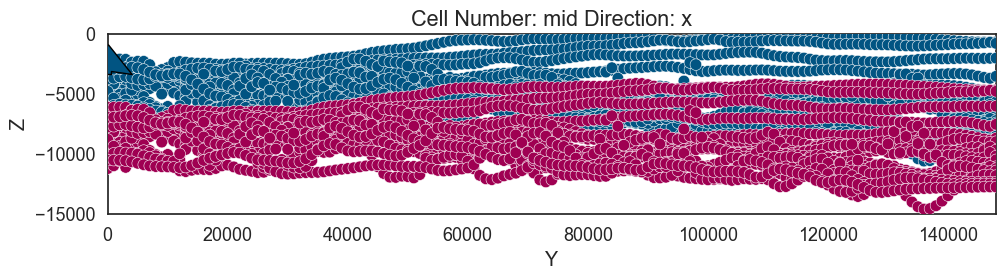

In [5]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=2, legend=False)
gp.plot_2d(geo_model, direction="x", show_data=True, show_lith=True, ve=2, legend=False)
# gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

In [6]:
# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="basic",
    image=False,
    show_data=True,
    show_surfaces=True,
    show_scalar=True,
    show_boundaries=True,
    ve=2,
)

In [7]:
%%time
gp.set_interpolator(
    geo_model, 
    output=['geology'], 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    dtype="float64",  # for model stability
    verbose=[]
)

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                         values
range                 232744.5
$C_o$            1289761904.76
drift equations         [3, 3]
Wall time: 21.6 s


In [8]:
%%time
sol=gp.compute_model(geo_model, compute_mesh=True,)

Wall time: 7min 18s


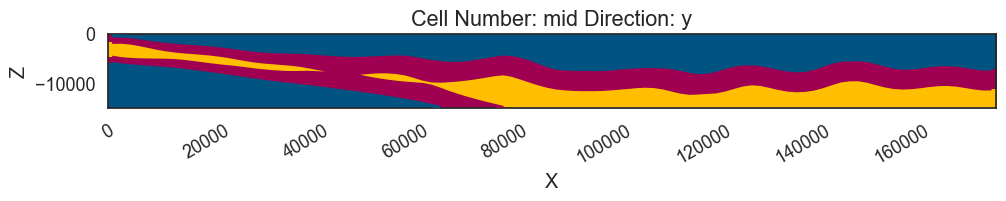

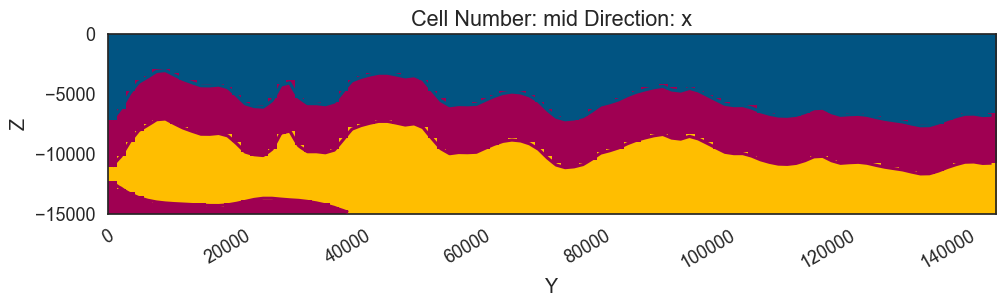

In [9]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=2,
    legend=True,
)

In [10]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type="basic", show_data=False, ve=2)

In [11]:
"""topo_init = tp.compute_topology(
    geo_model, direction="x", voxel_threshold=1
)  # , direction="Y", cell_number=15)
edges_init, centroids_init = tp.clean_unconformity_topology(
    geo_model, 1, topo_init[0], topo_init[1]
)"""

'topo_init = tp.compute_topology(\n    geo_model, direction="x", voxel_threshold=1\n)  # , direction="Y", cell_number=15)\nedges_init, centroids_init = tp.clean_unconformity_topology(\n    geo_model, 1, topo_init[0], topo_init[1]\n)'

In [12]:
"""# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot.plot_topology(geo_model, edges_init, centroids_init)"""

'# Seção transversal do modelo\ngp.plot_2d(\n    geo_model,\n    direction="y",\n    show_data=False,\n    show_lith=True,\n    ve=1,\n)\ngp.plot.plot_topology(geo_model, edges_init, centroids_init)'

In [13]:
"""# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(
    geo_model,
    path="../../../output/",
    compress=True,
)"""

'# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)\ngp.save_model(\n    geo_model,\n    path="../../../output/",\n    compress=True,\n)'